<font color='MediumSeaGreen'> 
    
# Classify Multiple Arabic Dialects from Twitter

Steps:
1. Download tweets from different Arabic-speaking cities by geolocating the twitter scraper - Cairo-Egypt, Riyadh-Saudi Arabia, Amman-Jordan, Casablanca-Morocco, Baghdad-Iraq, and Modern Standard Arabic from news outlets
    - 17,000 tweets were gathered for each dialect, comprising 102,000 total tweets
2. Apply dialect detection models from companion notebook to classify multiple Arabic dialects
3. Evaluate accuracy

<font color='MediumSeaGreen'> 

### Arabic Dialects Corpus from Twitter

<font color='MediumSeaGreen'> 

#### Saudi Arabian

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
saudi = pd.read_excel('Riyadh Tweets.xlsx') #tweets geolocated from Riyadh

In [2]:
saudi=saudi[['Created At','Location','Message']]

In [4]:
saudi['Label'] = 'Saudi'
display(saudi.head())
saudi.shape

,Created At,Location,Message,Label
0,2019-06-24 12:43:22,المملكة العربية السعودية,@AJArabic باقي 22 دقيقه يفتح انجاز بنحوله ...,Saudi
1,2019-06-24 12:43:22,Riyadh,من رضي بالله ربا وبالإسلام دينا وبمحمد نبيا وج...,Saudi
2,2019-06-24 12:43:22,الرياض,المقابل #المالي #للإقامة_المميزة : https://t.c...,Saudi
3,2019-06-24 12:43:21,Saudi Arabia,من فرط الحب له ولعيونه احس ودي انو لي قلب ثاني...,Saudi
4,2019-06-24 12:43:21,الرياض,تعالو خاص 💸,Saudi


(17000, 4)

<font color='MediumSeaGreen'> 

#### Egyptian

In [5]:
import pandas as pd
egypt = pd.read_excel('Cairo Tweets.xlsx') #tweets geolocated from Cairo

In [6]:
egypt=egypt[['Created At','Location','Message']]

In [7]:
egypt['Label'] = 'Egyptian'
display(egypt.head())
egypt.shape

,Created At,Location,Message,Label
0,2019-06-23 14:21:02,Egypt,علشان نيوبورن دايماً بتشاركك فى تشجيعك💪💪\n يلا...,Egyptian
1,2019-06-23 14:21:02,Egypt,@ebrahim_srour95 الفرع الجاى فى دكرنس 😅,Egyptian
2,2019-06-23 14:21:02,Egypt,@lioromio المشكلة انه حتى لا يصلح للتريقة دي و...,Egyptian
3,2019-06-23 14:21:01,Egypt,@ehabbebo33 @C0d3l3ss اوبا الشله الحلوه كلها ♥...,Egyptian
4,2019-06-23 14:21:01,Mansoura,عيب عليكى ي اس دا انا حته صغيرة في نفسي كدا😸😸 ...,Egyptian


(17000, 4)

<font color='MediumSeaGreen'> 

#### Levantine

In [8]:
import pandas as pd
jordan = pd.read_excel('Levant Tweets.xlsx') #tweets geolocated from Amman

In [9]:
jordan=jordan[['Created At','Location','Message']]

In [10]:
jordan['Label'] = 'Levantine'
display(jordan.head())
jordan.shape

,Created At,Location,Message,Label
0,2019-08-18 19:10:47,Gaza,@marah_moneer عأساس إني بستأذن إمي طيب مهي زي ...,Levantine
1,2019-08-18 19:10:44,"Palestine, Gaza",@sohad_ashraf بس بقى مع الزهق,Levantine
2,2019-08-18 19:10:39,Amman,@farahalfetyani انت جيبي صورة سفانة الزابطة ول...,Levantine
3,2019-08-18 19:10:38,فلسطين-غزة,من شاطئ بحر غزة بعدستي 👌 https://t.co/ovBTBjTKeS,Levantine
4,2019-08-18 19:10:34,nablus,كيف الناس بقدرو يكونو سيئيين للهدرجه ؟,Levantine


(17000, 4)

<font color='MediumSeaGreen'> 

#### Moroccan

In [11]:
import pandas as pd
maroc = pd.read_excel('Maroc Tweets.xlsx') #tweets geolocated from Casablanca

In [12]:
maroc=maroc[['Created At','Location','Message']]

In [13]:
maroc['Label'] = 'Moroccan'
display(maroc.head())
maroc.shape

,Created At,Location,Message,Label
0,2019-08-18 15:45:15,maroc,@M__1437 نصالحه بسرعة جتى لا تنطفئ جذوة المشاع...,Moroccan
1,2019-08-18 15:45:14,Royaume du Maroc,السحر من الأمراض الروحانية المتعبة والتي يعاني...,Moroccan
2,2019-08-18 15:45:11,Casablanca,@wahid_Elya لا ... اسمح لي ، بلادك تتبقى بلادك,Moroccan
3,2019-08-18 15:45:07,"UAE,RAK",@Sswearah84sS هيه اصلا في وايد اشيا طعمهم غير,Moroccan
4,2019-08-18 15:45:04,Around,@9Kora ياخي افهم 🤣💛💛💛💛 #مرابط_ياخي❤️,Moroccan


(17000, 4)

<font color='MediumSeaGreen'> 

#### Iraqi

In [14]:
import pandas as pd
iraq = pd.read_excel('Iraqi Tweets.xlsx') #tweets geolocated from Baghdad

In [15]:
iraq=iraq[['Created At','Location','Message']]

In [17]:
iraq['Label'] = 'Iraqi'
display(iraq.head())
iraq.shape

,Created At,Location,Message,Label
0,2019-08-18 02:49:00,"bagdad,iraq",@Moha_baghdad ماكو احلى من الحجي البغدادي 😍😍,Iraqi
1,2019-08-18 02:48:56,العراق، بغداد,@Bo_Kanna اما,Iraqi
2,2019-08-18 02:48:50,العراق، بغداد,@Aslan__RM اي والله,Iraqi
3,2019-08-18 02:48:30,Iraq,@Nooooof911f العراق والسعودية اهل من زمان 💛,Iraqi
4,2019-08-18 02:48:00,ملتفه حول القمر مبعثره بالسماء,نتي جبار شكل واي فاي علي رضا محول لي 😭😍,Iraqi


(17000, 4)

<font color='MediumSeaGreen'> 

#### Modern Standard Arabic (news)

In [18]:
import pandas as pd
msa = pd.read_excel('MSA Tweets.xlsx') #tweets from media timeline

In [19]:
msa=msa[['Created At','Location','Message']]

In [20]:
msa['Label'] = 'MSA'
display(msa.head())
msa.shape

,Created At,Location,Message,Label
0,2019-06-25 17:30:09,Qatar,ما وراء الخبر - يناقش ما رشح عن اجتماع مستشاري...,MSA
1,2019-06-25 17:21:22,Qatar,RT @AJABreaking: عاجل | آنييس كالامار: كان يمك...,MSA
2,2019-06-25 17:02:56,Qatar,RT @ajmidan: تزامنا مع #ورشة_البحرين الاقتصادي...,MSA
3,2019-06-25 16:31:29,Qatar,RT @AJABreaking: عاجل | كوشنر: القيادات الفلسط...,MSA
4,2019-06-25 16:30:00,Qatar,توقيع مذكرة تفاهم بين مكتب الأمم المتحدة لمكاف...,MSA


(19376, 4)

<font color='MediumSeaGreen'> 

#### Dialects Combined

In [21]:
frames = [saudi,egypt,jordan,maroc,iraq,msa]
df = pd.concat(frames)
df.to_excel("All Arabic Dialect Tweets Labeled.xlsx")
df.shape

(104376, 4)

<font color='MediumSeaGreen'> 

### Clean Tweets

In [22]:
df.isna().sum()

Created At       0
Location      5035
Message          4
Label            0
dtype: int64

In [23]:
df.dropna(subset=['Message'],inplace=True)

In [24]:
df.shape

(104372, 4)

In [25]:
import re
df['clean_tweet'] = df.Message.str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) #removes emojis
df['clean_tweet'] = df.clean_tweet.str.replace('@[_A-Za-z0-9]+', '') #removes handles
df['clean_tweet'] = df.clean_tweet.str.replace('RT', '') #removes rt
df['clean_tweet'] = df.clean_tweet.str.replace('#',' ') #removes hashtag symbol only
df['clean_tweet'] = df.clean_tweet.str.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #removes links
df['clean_tweet'] = df.clean_tweet.str.replace('\d+', '') #removes numbers
df['clean_tweet'] = df.clean_tweet.str.replace('\n', ' ') #removes new line
df['clean_tweet'] = df.clean_tweet.str.replace('_', '') #removes underscore
df['clean_tweet'] = df.clean_tweet.str.replace('[^\w\s]','') #removes punctuation

In [26]:
df1 = df.head(102000)

In [27]:
df1.Label.value_counts(normalize=True)*100

MSA          16.670588
Saudi        16.666667
Moroccan     16.666667
Levantine    16.666667
Iraqi        16.666667
Egyptian     16.662745
Name: Label, dtype: float64

In [28]:
display(df1.head())
display(df1.shape)

,Created At,Location,Message,Label,clean_tweet
0,2019-06-24 12:43:22,المملكة العربية السعودية,@AJArabic باقي 22 دقيقه يفتح انجاز بنحوله ...,Saudi,باقي دقيقه يفتح انجاز بنحوله دولار على...
1,2019-06-24 12:43:22,Riyadh,من رضي بالله ربا وبالإسلام دينا وبمحمد نبيا وج...,Saudi,من رضي بالله ربا وبالإسلام دينا وبمحمد نبيا وج...
2,2019-06-24 12:43:22,الرياض,المقابل #المالي #للإقامة_المميزة : https://t.c...,Saudi,المقابل المالي للإقامةالمميزة
3,2019-06-24 12:43:21,Saudi Arabia,من فرط الحب له ولعيونه احس ودي انو لي قلب ثاني...,Saudi,من فرط الحب له ولعيونه احس ودي انو لي قلب ثاني...
4,2019-06-24 12:43:21,الرياض,تعالو خاص 💸,Saudi,تعالو خاص


(102000, 5)

<font color='MediumSeaGreen'> 

#### Arabic stopwords

In [29]:
import nltk
nltk.download("stopwords") #arabic stopwords are not biult-in, so we find them by calling a set object
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /home/dog/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(arb_stopwords)

{'تينك', 'هم', 'اللواتي', 'هي', 'بي', 'مذ', 'ولو', 'هيت', 'بل', 'هاته', 'لوما', 'هلا', 'هما', 'لكن', 'حين', 'إذ', 'نحن', 'لست', 'أولاء', 'ذواتا', 'هنا', 'نعم', 'هكذا', 'اللائي', 'ها', 'آها', 'وما', 'عند', 'بهم', 'أم', 'كلما', 'كأن', 'على', 'كلاهما', 'أنا', 'ليسوا', 'خلا', 'أنتما', 'لسنا', 'بمن', 'لنا', 'إليكن', 'هاهنا', 'حيثما', 'مما', 'كلا', 'فلا', 'كيفما', 'هناك', 'هيهات', 'ليس', 'إذما', 'ذلك', 'متى', 'بكن', 'ذا', 'حبذا', 'إذن', 'اللتان', 'حتى', 'كليكما', 'ذانك', 'اللذان', 'أنت', 'ما', 'ذات', 'سوى', 'بخ', 'بلى', 'لستم', 'ألا', 'فيه', 'ذواتي', 'آي', 'سوف', 'هاتي', 'إليكما', 'فمن', 'لكيلا', 'تلكما', 'فإذا', 'بك', 'بين', 'ذلكم', 'أكثر', 'بعض', 'ذين', 'ريث', 'كليهما', 'دون', 'لو', 'لئن', 'كأين', 'لا', 'أي', 'عدا', 'كلتا', 'بس', 'أينما', 'بكما', 'حاشا', 'أيها', 'ذه', 'عل', 'نحو', 'هنالك', 'فإن', 'وإذ', 'أنى', 'عما', 'ته', 'كل', 'لم', 'بماذا', 'بما', 'بيد', 'لدى', 'في', 'بنا', 'ماذا', 'هذي', 'هو', 'كأنما', 'لي', 'لسن', 'إنا', 'هذين', 'إما', 'هذا', 'إنه', 'ثمة', 'شتان', 'بعد', 'لعل', 'لن', 

In [31]:
def delete_stop_words(mess):
    
    stop_words = set(nltk.corpus.stopwords.words("arabic"))
    
    return ' '.join(word for word in mess.split() if word not in stop_words and len(word)>1)

In [32]:
df1['clean_tweet'] = df1['clean_tweet'].apply(delete_stop_words)

<font color='MediumSeaGreen'> 

# Dialect Detection with Machine Learning

In [33]:
df1.head()

,Created At,Location,Message,Label,clean_tweet
0,2019-06-24 12:43:22,المملكة العربية السعودية,@AJArabic باقي 22 دقيقه يفتح انجاز بنحوله ...,Saudi,باقي دقيقه يفتح انجاز بنحوله دولار بنك انقره و...
1,2019-06-24 12:43:22,Riyadh,من رضي بالله ربا وبالإسلام دينا وبمحمد نبيا وج...,Saudi,رضي بالله ربا وبالإسلام دينا وبمحمد نبيا وجبت ...
2,2019-06-24 12:43:22,الرياض,المقابل #المالي #للإقامة_المميزة : https://t.c...,Saudi,المقابل المالي للإقامةالمميزة
3,2019-06-24 12:43:21,Saudi Arabia,من فرط الحب له ولعيونه احس ودي انو لي قلب ثاني...,Saudi,فرط الحب ولعيونه احس ودي انو قلب ثاني احبه ماي...
4,2019-06-24 12:43:21,الرياض,تعالو خاص 💸,Saudi,تعالو خاص


<font color='MediumSeaGreen'> 

### Convert Text to Numerical Features

In [67]:
from sklearn.model_selection import train_test_split

data = df['clean_tweet'].astype(str)
target = df['Label'].astype('category')

# Split dataset into training set and test set before feature extraction
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.4,random_state=109, shuffle=True) 
# 60% training and 40% test

In [68]:
#feature extractin starts with counting the unique features
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(62623, 87880)

In [69]:
#then transforms the features
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(62623, 87880)

In [70]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(62623, 87880)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

features = X_train_tfidf
labels = y_train
features.shape

(62623, 87880)

<font color='MediumSeaGreen'> 

### Model Comparison

In [41]:
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [58]:
import matplotlib as plt
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(random_state=0, tol=1e-5),
    SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=109,
                                           max_iter=5, tol=None,shuffle=True),
    MultinomialNB(),
    BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
    LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [59]:
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB               0.707759
LinearSVC                 0.766140
LogisticRegression        0.725724
MultinomialNB             0.718841
RandomForestClassifier    0.189946
SGDClassifier             0.659662
Name: accuracy, dtype: float64

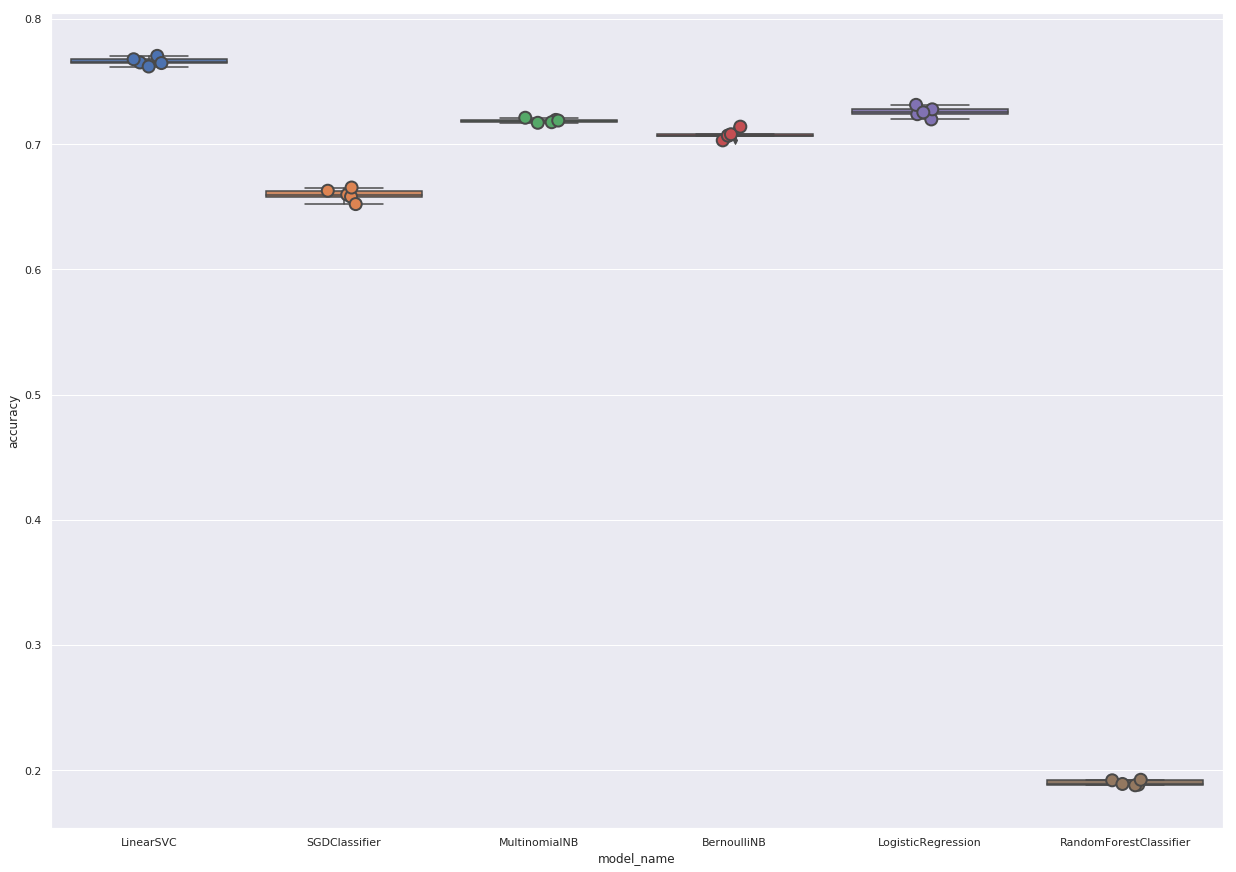

In [60]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=12, jitter=True, edgecolor="gray", linewidth=2)
sns.set(rc={'figure.figsize':(21,15)})

Plot Citation:
- https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

<font color='MediumSeaGreen'> 

### Model Selection and Evaluation - Linear SVC

In [72]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
model = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5)),
                    ])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
target = df1['Label'].astype('category')
print('categories: {}'.format(target.cat.categories))

categories: Index(['Egyptian', 'Iraqi', 'Levantine', 'MSA', 'Moroccan', 'Saudi'], dtype='object')


In [63]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=target.cat.categories))

              precision    recall  f1-score   support

    Egyptian       0.70      0.58      0.63      6770
       Iraqi       0.79      0.88      0.83      6763
   Levantine       0.72      0.71      0.71      6714
         MSA       0.92      0.97      0.94      7745
    Moroccan       0.86      0.95      0.90      6895
       Saudi       0.66      0.61      0.63      6862

   micro avg       0.79      0.79      0.79     41749
   macro avg       0.78      0.78      0.78     41749
weighted avg       0.78      0.79      0.78     41749



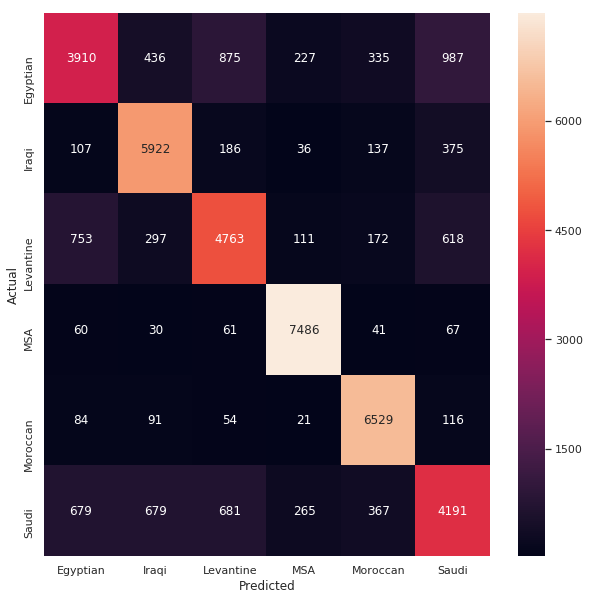

In [64]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target.cat.categories, yticklabels=target.cat.categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [73]:
from sklearn.model_selection import cross_val_score
X, y = data, target
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.76992719, 0.81723675, 0.81704513, 0.82059021, 0.74834723])

In [74]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.06)


In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.63253256, 0.83302856, 0.71441428, 0.94216852, 0.90204476,
       0.63423123])

<font color='MediumSeaGreen'> 

#### Save model for future use

In [85]:
import pickle
s = pickle.dumps(model)

In [87]:
from joblib import dump, load
dump(model, 'ArabicDialects.joblib')

['ArabicDialects.joblib']

In [ ]:
text_clf = load('ArabicDialects.joblib')